In [1]:
import torch
import torch.nn as nn

from config import *
from model import CascadedNet
from dataset import MyDataset
from trainerFunc import train_ch

In [2]:
func_type = 2
if func_type == 1:
    input_dim = 1
    output_dim = 1
elif func_type == 2:
    input_dim = 2
    output_dim = 1
else:
    input_dim = 2
    output_dim = 2

In [3]:
dataSet = MyDataset(type=func_type, device=device)
train_iter, test_iter = dataSet.data_iter, dataSet.test_iter

In [4]:
net = CascadedNet(input_dim, subnetwork_params).to(device)

# net = nn.Sequential(
#     nn.Linear(input_dim, 128),    # 输入维度为1（x）
#     nn.ReLU(),
#     nn.Linear(128, 256),
#     nn.Tanh(),
#     nn.Linear(256, 128),
#     nn.SiLU(),            # 更平滑的激活函数（可选项）
#     nn.Linear(128, output_dim),
# ).to(device)

In [ ]:
loss = nn.MSELoss(reduction="none")  # 均方误差
trainer = torch.optim.Adam(net.parameters(), lr=learning_rate)
torch.nn.utils.clip_grad_norm_(net.parameters(), max_norm=1.0)  # 防止梯度爆炸

tensor(0.)

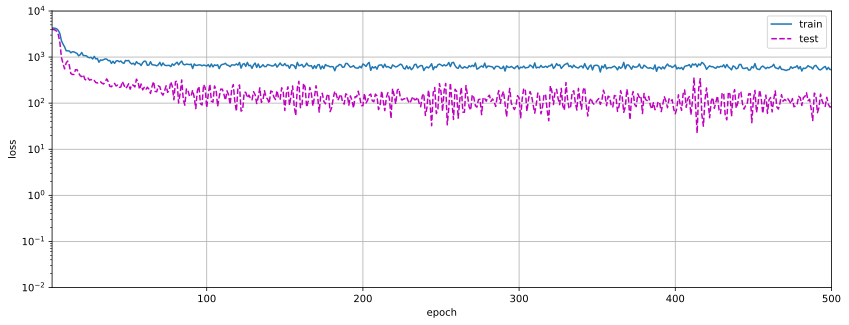

In [ ]:
train_ch(net, train_iter, test_iter, loss, num_epochs, trainer)